<a href="https://colab.research.google.com/github/surajpandey11/Team-5--Capstone/blob/main/Suraj_Pandey_Team_5_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

In [127]:
!pip install squarify
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import folium
import squarify
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from mpl_toolkits.basemap import Basemap


In [87]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [122]:
working_dir = '/content/drive/My Drive/AlmaBetter/Module 2/Week 1/Day 1/dat/'
# file_name= "Copy of globalterrorismdb_0718dist.csv"
filename=working_dir+'Copy of globalterrorismdb_0718dist.csv'
terror_df=pd.read_csv(filename,encoding = "cp1252")


In [ ]:
# pd.read_csv('/content/drive/My Drive/AlmaBetter/Module 2/Week 1/Day 1/dat Copy of globalterrorismdb_0718dist.csv')

In [ ]:
# working_dir='/content/drive/My Drive/Almabetter/Cohort Aravali/Module 2/Week 1/'
# filename=working_dir+'globalterrorismdb_0718dist.csv'
# terror_df=pd.read_csv(filename,encoding = "cp1252")



In [123]:
terror_df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [90]:
a=terror_df['imonth'].value_counts()
a

5     16875
7     16268
8     15800
10    15563
6     15359
3     15257
4     15152
1     14936
11    14906
9     14180
2     13879
12    13496
0        20
Name: imonth, dtype: int64

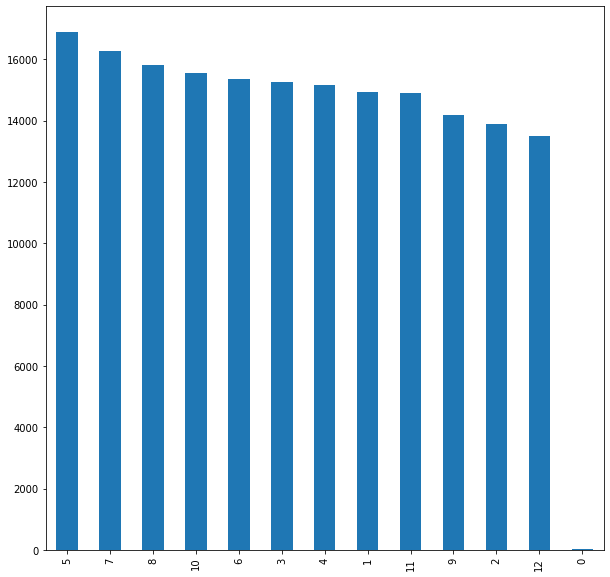

In [91]:
a.plot(kind='bar')

In [92]:
b=terror_df['country_txt'].value_counts()

b

Iraq                 24636
Pakistan             14368
Afghanistan          12731
India                11960
Colombia              8306
                     ...  
South Vietnam            1
Wallis and Futuna        1
Falkland Islands         1
St. Lucia                1
International            1
Name: country_txt, Length: 205, dtype: int64

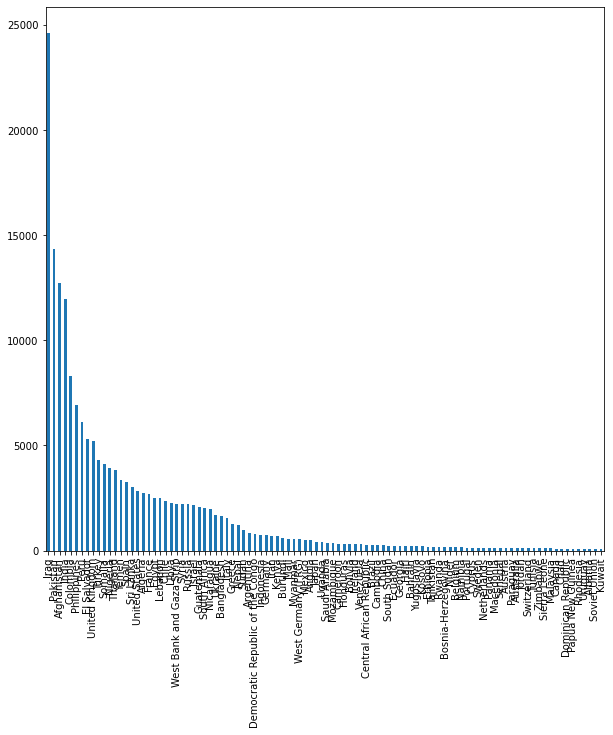

In [93]:
b.head(100).plot(kind='bar')
plt.rcParams['figure.figsize'] = (30, 10)

In [94]:
d=terror_df['region_txt'].value_counts()
d

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: region_txt, dtype: int64

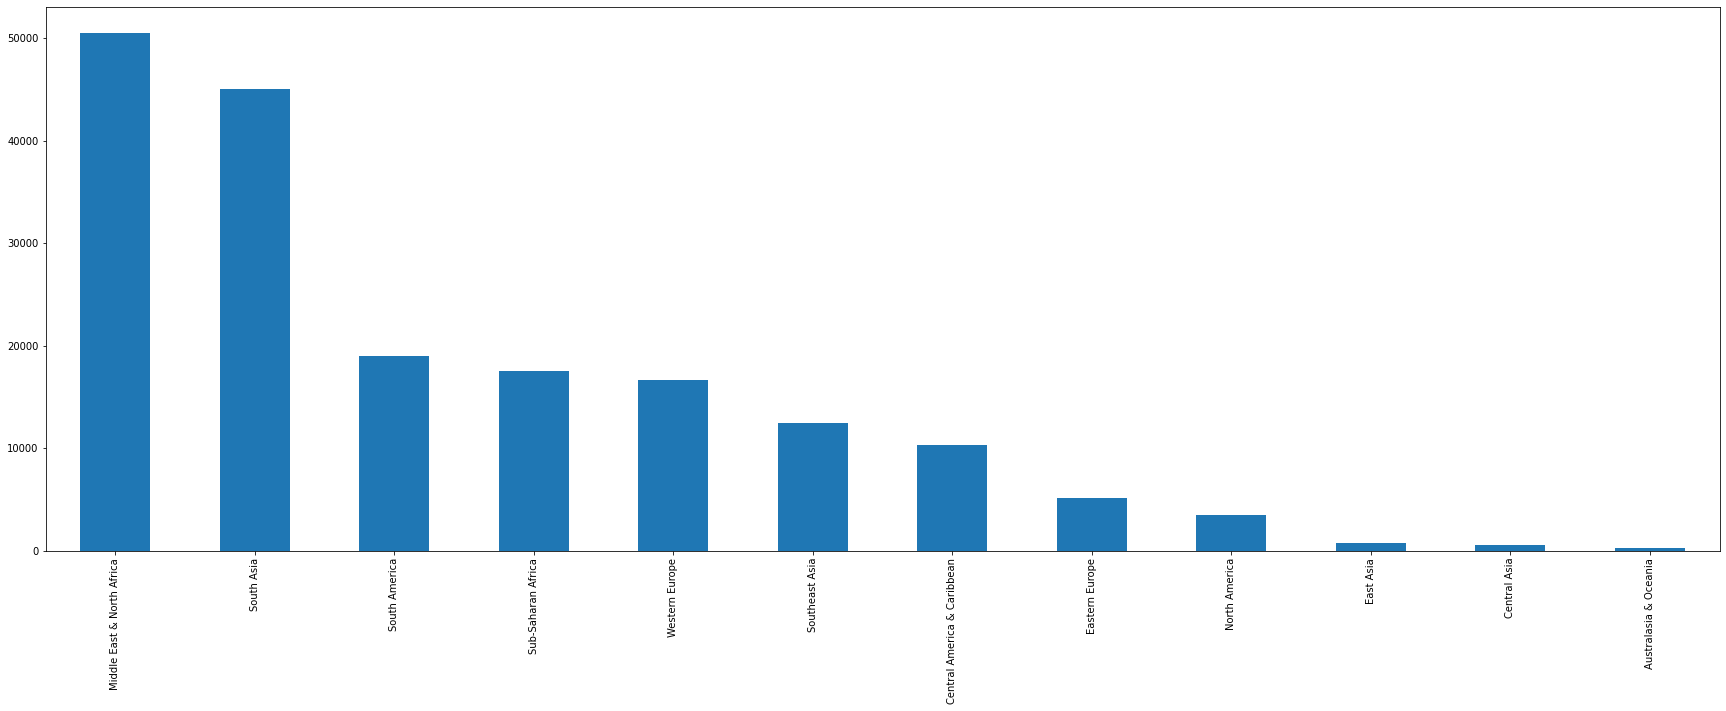

In [95]:
d.plot(kind='bar')
plt.rcParams['figure.figsize'] = (10, 10)



In [96]:
e=terror_df['city'].value_counts()
e

Unknown          9775
Baghdad          7589
Karachi          2652
Lima             2359
Mosul            2265
                 ... 
Khado               1
Old Poblacion       1
Muchay              1
Casabangan          1
Circasia            1
Name: city, Length: 36674, dtype: int64

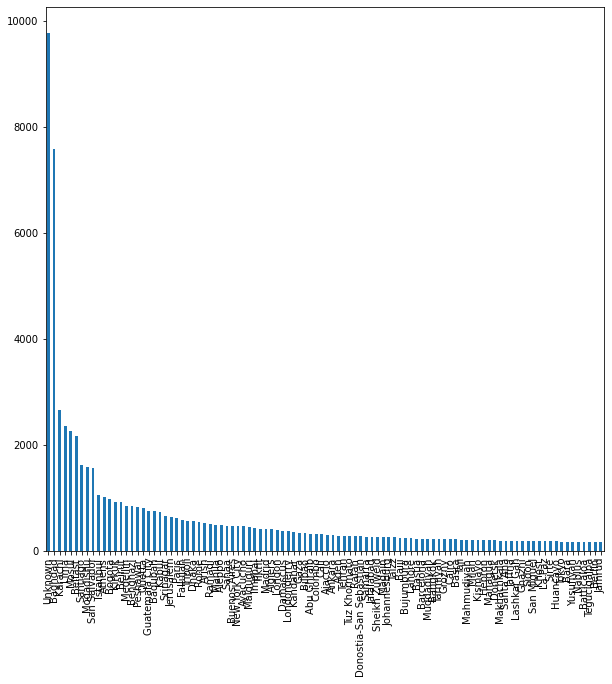

In [97]:
e.head(100).plot(kind='bar')
plt.rcParams['figure.figsize'] = (40, 20)

In [ ]:
f=terror_df['targtype1_txt'].value_counts()
f

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: targtype1_txt, dtype: int64

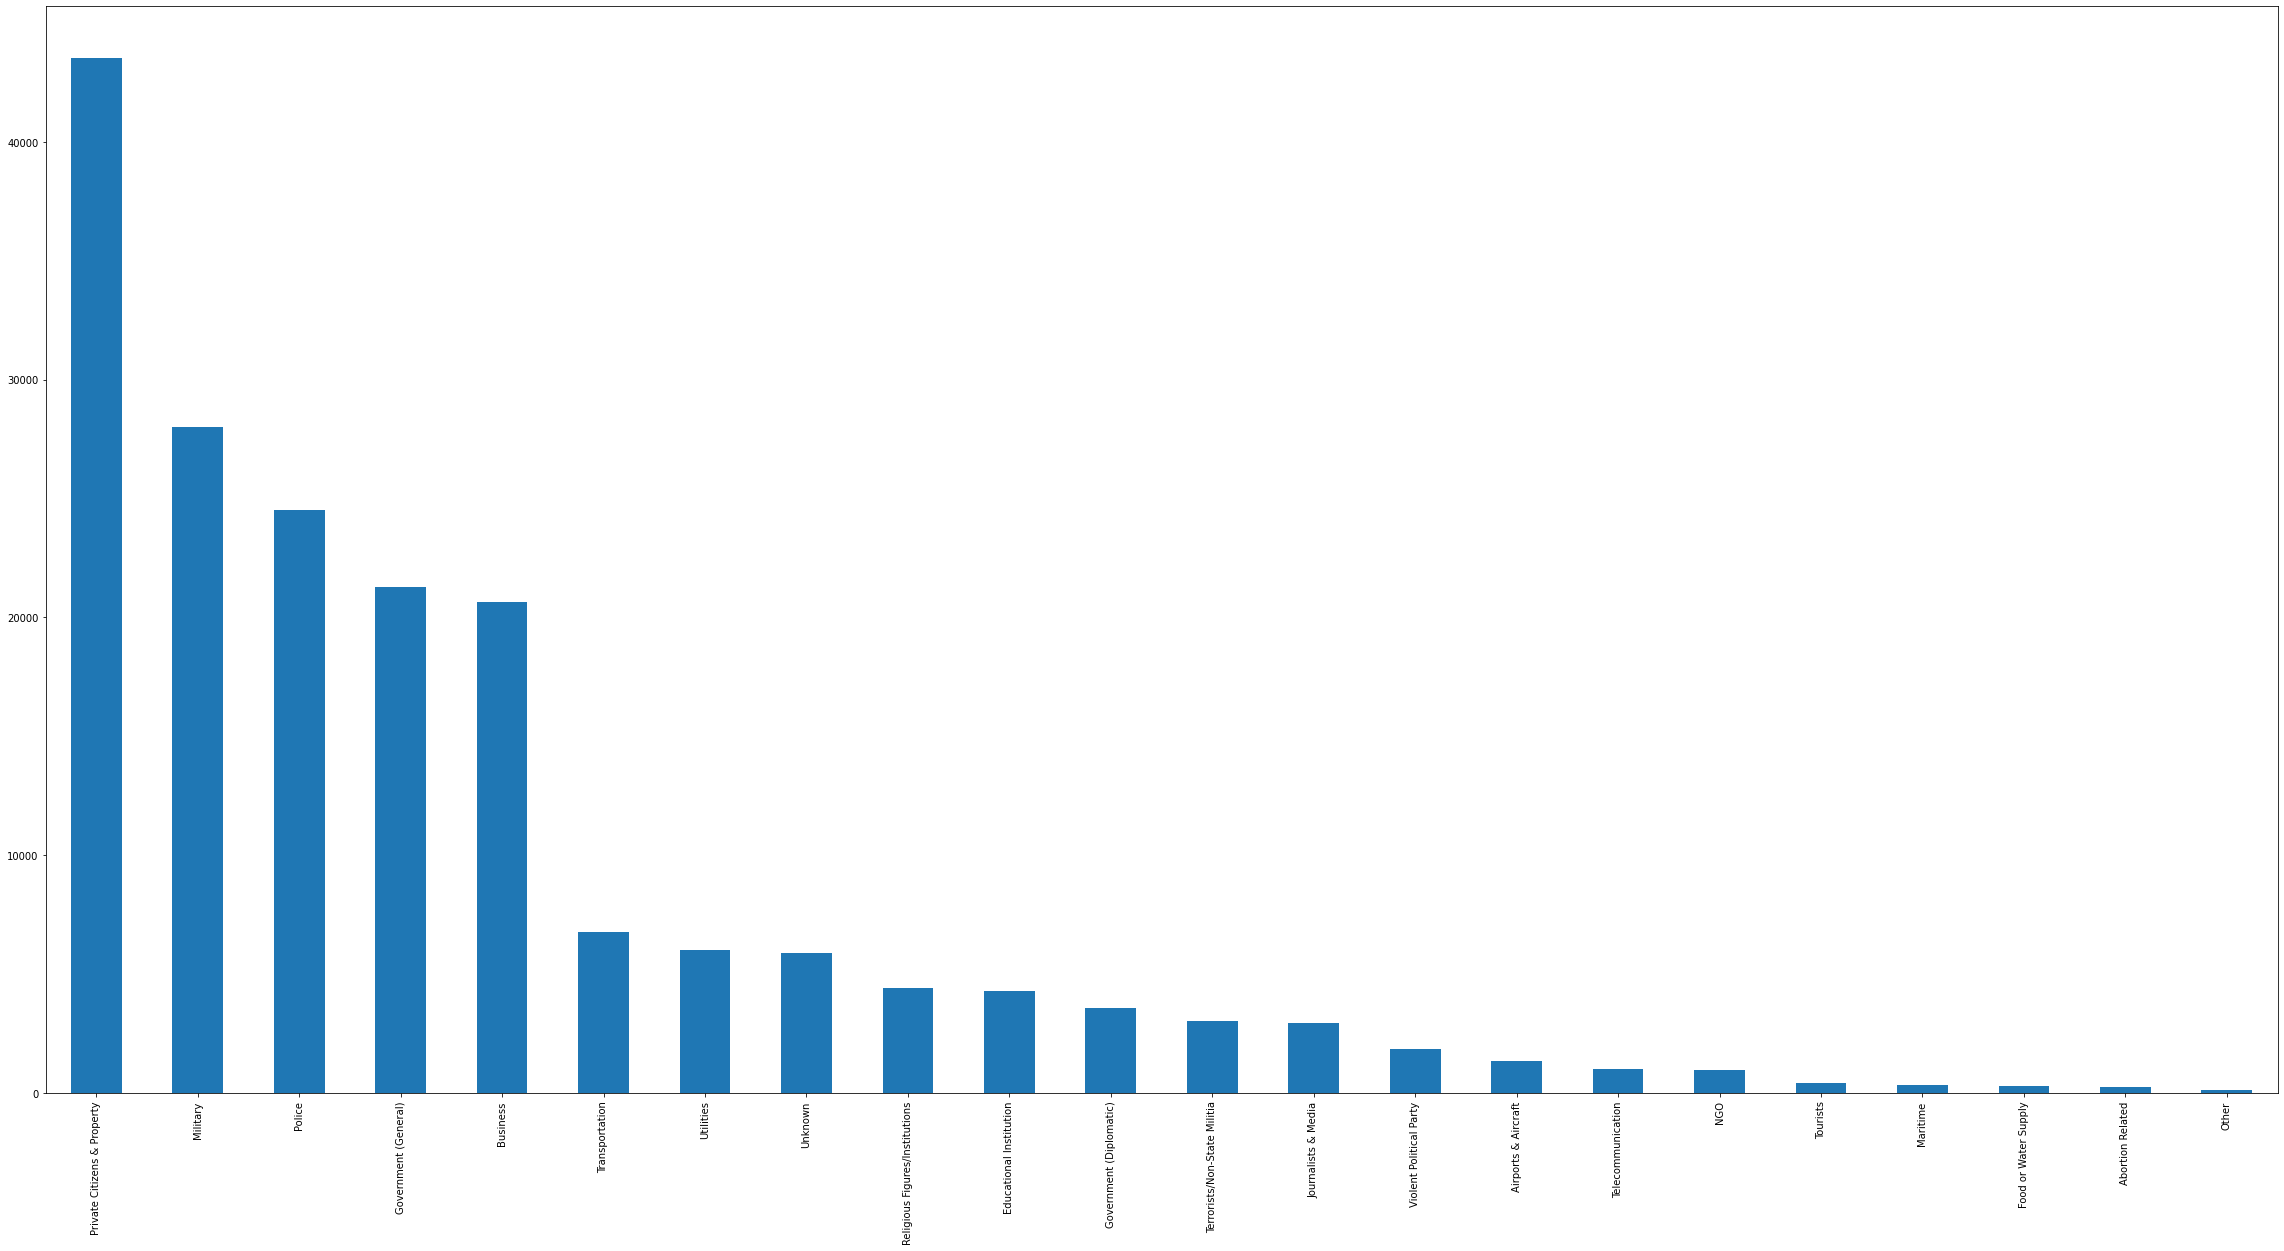

In [ ]:
f.head(100).plot(kind='bar')
plt.rcParams['figure.figsize'] = (20, 10)

In [ ]:
no_na_df=terror_df.dropna(axis=1, how='all', thresh=None, subset=None)
no_na_df


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,2.0,0,The incident occurred near the town of Balcad.,12/31/2017: Assailants opened fire on a Somali...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,4,Military,36.0,Military Checkpoint,Somali National Army (SNA),Checkpoint,...,NaN,NaN,NaN,1.0,0.0,0.0,2.0,0.0,0.0,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,20

In [98]:
success_df=terror_df['success'].value_counts()
t=success_df.to_frame()
t

success_rate =(t.iloc[0,0])*100/((t.iloc[0,0])+(t.iloc[1,0])) 
print(f'success_rate is {round(success_rate)}%')

success_rate is 89.0%


In [ ]:
t

,success
1,161632
0,20059


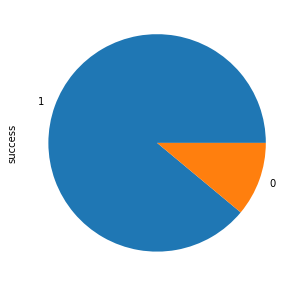

In [99]:
plot = success_df.plot.pie(y='success', figsize=(5, 5))

([<matplotlib.patches.Wedge at 0x7f2ad18884e0>,
 [Text(-1.0344977358600456, 0.3739176841237112, 'successful'),
  Text(1.034497709603518, -0.3739177567662117, 'unsuccessful')],
 [Text(-0.5642714922872976, 0.20395510043111517, '89%'),
  Text(0.5642714779655551, -0.20395514005429727, '11%')])

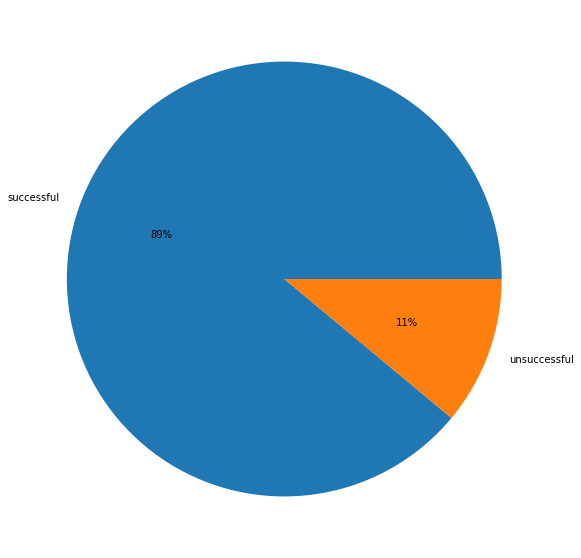

In [ ]:
plt.pie(success_df, labels=({"successful":1,'unsuccessful':0}), autopct='%1.0f%%')

In [ ]:
# pip install geopy
# from geopy.geocoders import Nominatim
# geolocator = Nominatim(user_agent="specify_your_app_name_here")
# location = geolocator.reverse("18.456792, -69.951164")
# print(location.address)

In [ ]:
# import matplotlib.pyplot as plt
# plt.scatter(x=terror_df['longitude'], y=terror_df['latitude'])
# plt.show()


# conda install geopandas
# from shapely.geometry import Point
# import geopandas as gpd
# from geopandas import GeoDataFrame

# df = pd.read_csv("Copy of globalterrorismdb_0718dist.csv", delimiter=',', skiprows=0, low_memory=False)

# geometry = [Point(xy) for xy in zip(terror_df['longitude'], terror_df['latitude'])]
# gdf = GeoDataFrame(terror_df, geometry=geometry)   

# #this is a simple map that goes with geopandas
# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

In [ ]:
z=terror_df['iyear'].value_counts()
z


2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
2009     4721
1991     4683
1989     4324
1990     3887
1988     3721
1984     3495
1994     3456
2007     3242
1997     3197
1987     3183
1995     3081
1996     3058
1985     2915
1983     2870
1986     2860
2006     2758
1979     2662
1980     2662
1981     2586
1982     2544
2005     2017
2001     1906
2000     1814
1978     1526
1999     1395
2002     1333
1977     1319
2003     1278
2004     1166
1998      934
1976      923
1975      740
1970      651
1974      581
1972      568
1973      473
1971      471
Name: iyear, dtype: int64

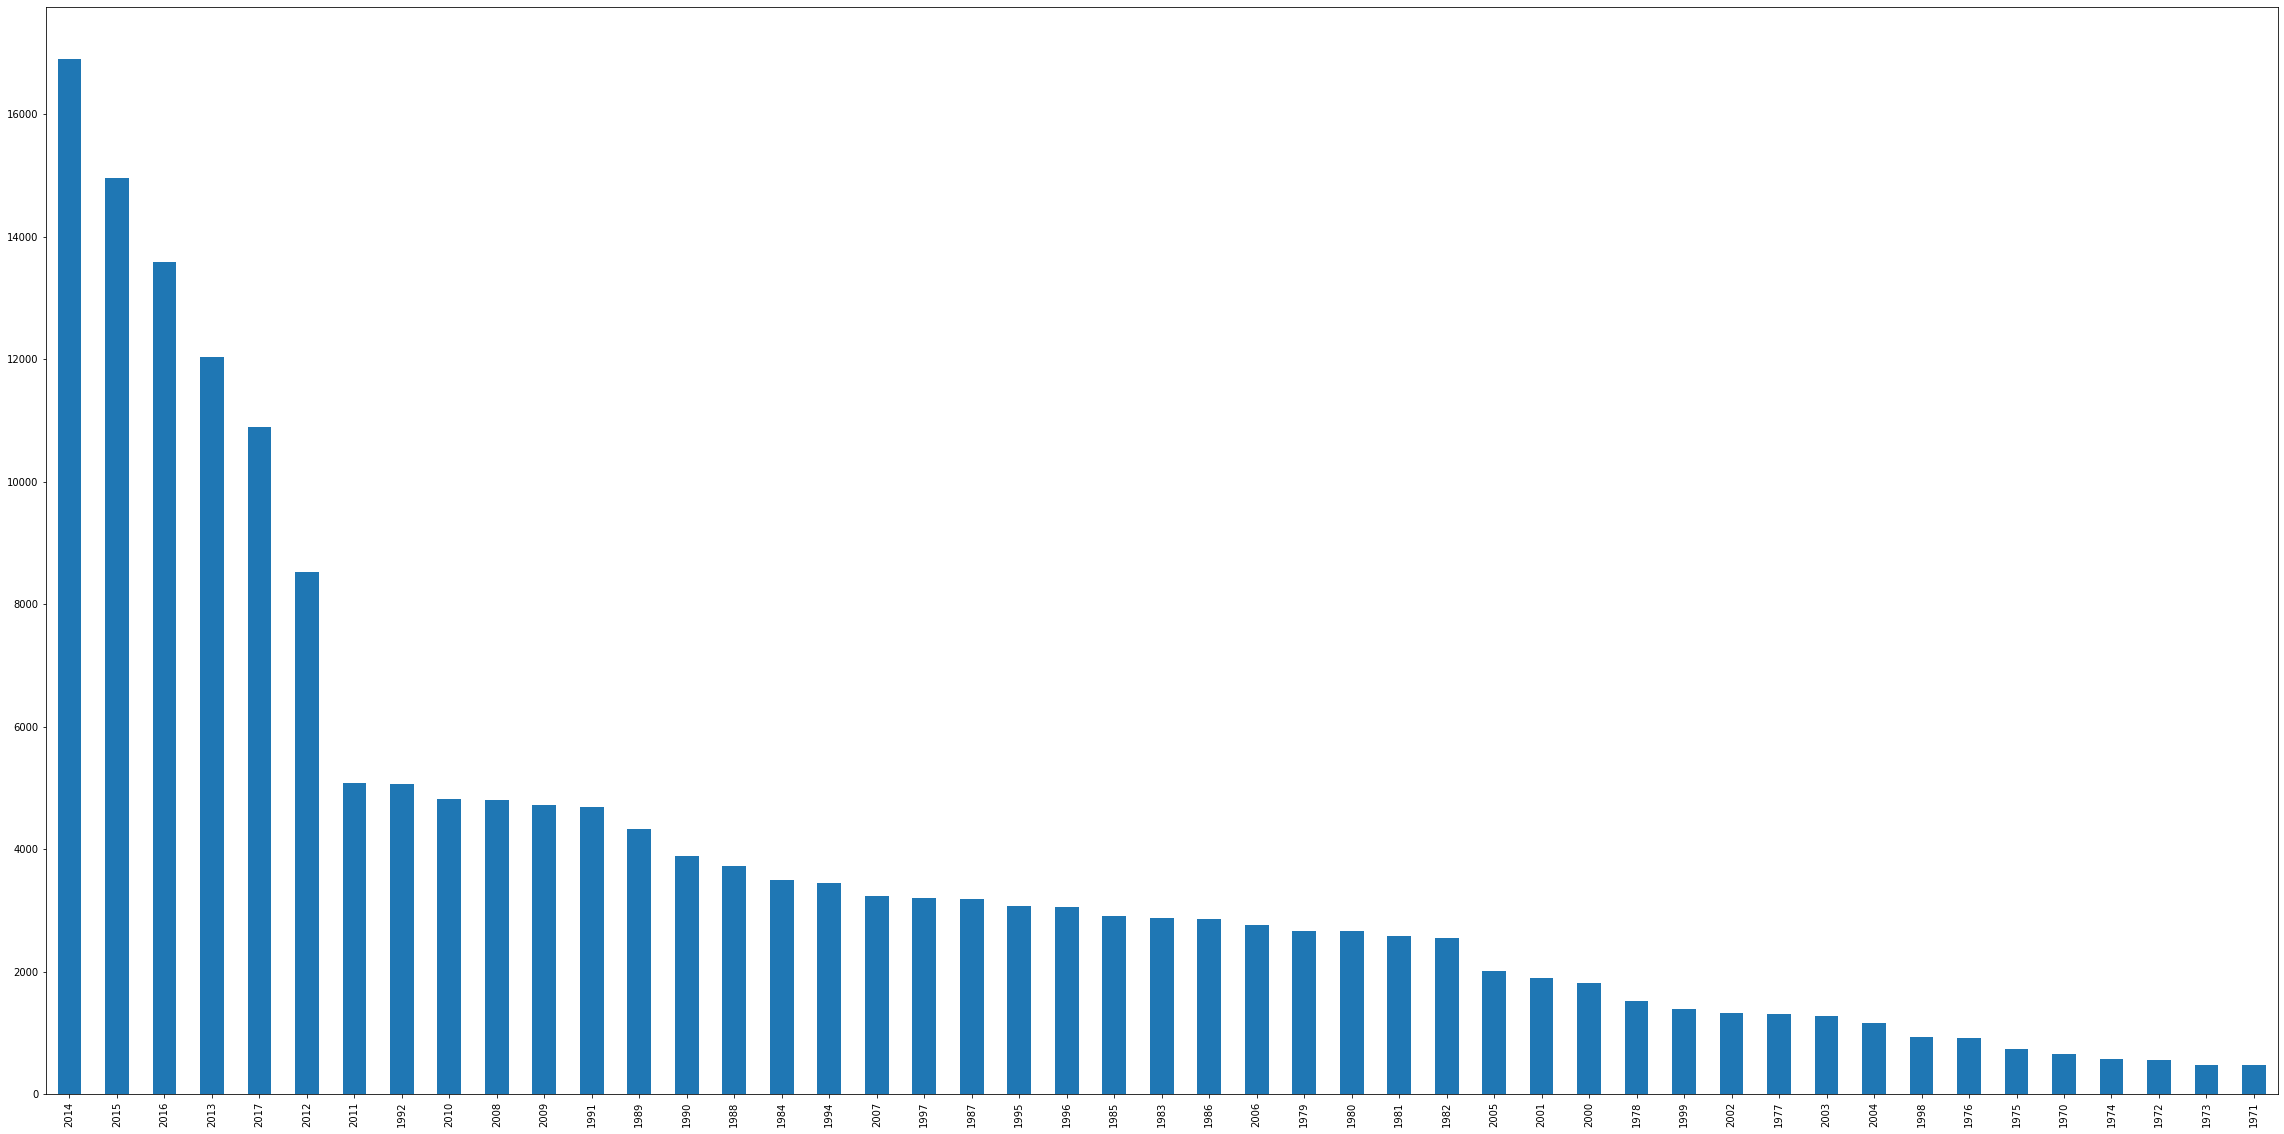

In [100]:
z.head(50).plot(kind='bar')
plt.rcParams['figure.figsize'] = (20, 10)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


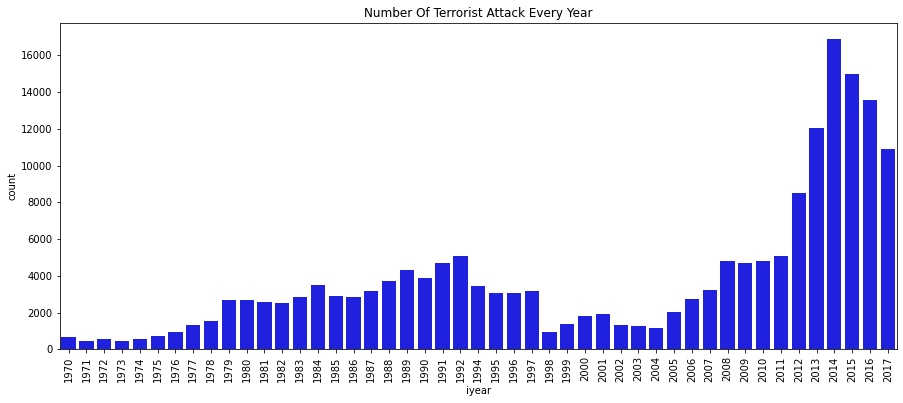

In [101]:
plt.subplots(figsize=(15,6))
sns.countplot('iyear',data=terror_df,color='blue')
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Attack Every Year')

plt.show()

In [102]:
attack=terror_df['attacktype1_txt'].value_counts()
attack


Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: attacktype1_txt, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


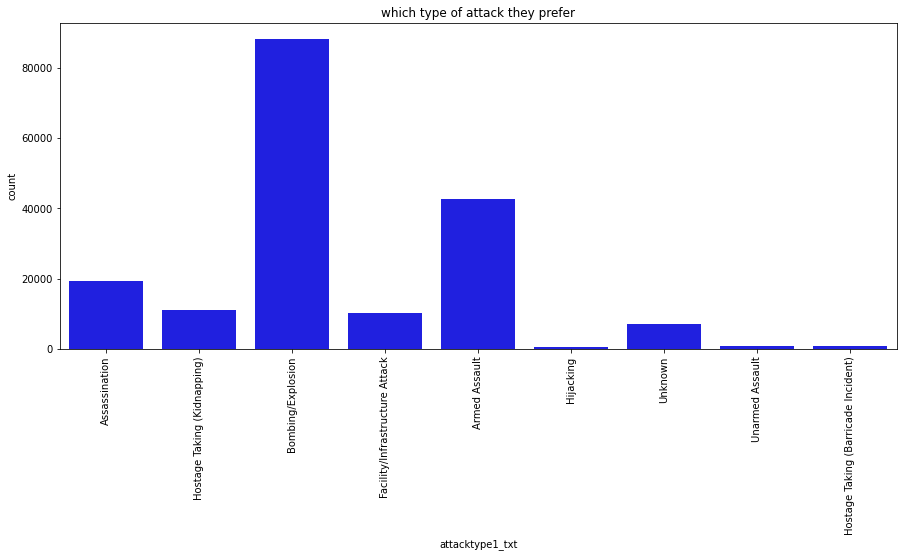

In [103]:
plt.subplots(figsize=(15,6))
sns.countplot('attacktype1_txt',data=terror_df,color='blue')
plt.xticks(rotation=90)
plt.title('which type of attack they prefer')

plt.show()

In [104]:
attack_subtype=terror_df['targsubtype1_txt'].value_counts()
attack_subtype


Unnamed Civilian/Unspecified                               11596
Police Security Forces/Officers                            11178
Military Unit/Patrol/Convoy                                 8277
Military Personnel (soldiers, troops, officers, forces)     7963
Government Personnel (excluding police, military)           6610
                                                           ...  
Multiple Telecommunication Targets                            31
Fire Fighter/Truck                                            27
Oil Tanker                                                    19
Personnel                                                     19
Internet Infrastructure                                       12
Name: targsubtype1_txt, Length: 112, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


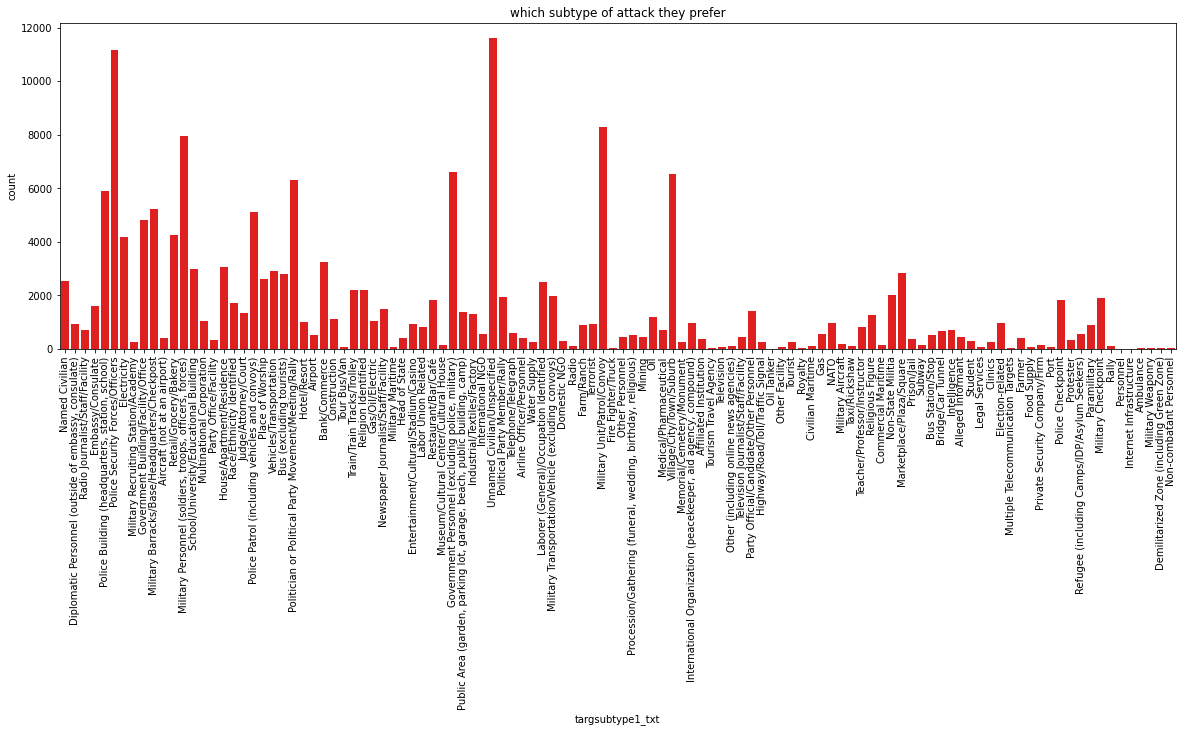

In [105]:
plt.subplots(figsize=(20,6))
sns.countplot('targsubtype1_txt',data=terror_df,color='red')
plt.xticks(rotation=90)
plt.title('which subtype of attack they prefer')

plt.show()

In [ ]:
# terror_df[which(colMeans(!is.na(terror_df)) > 0.5)]

In [106]:
red_terror_df = terror_df.loc[:, terror_df.isin([np.nan]).mean() <.8]
red_terror_df.tail()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,gname,motive,guncertain1,individual,nperps,nperpcap,claimed,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,ransom,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
181686,201712310022,2017,12,31,0,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,2.0,0,The incident occurred near the town of Balcad.,12/31/2017: Assailants opened fire on a Somali...,1,1,0,1.0,0.0,1,0,2,Armed Assault,4,Military,36.0,Military Checkpoint,Somali National Army (SNA),Checkpoint,182.0,Somalia,Al-Shabaab,NaN,0.0,0,-99.0,0.0,1.0,5,Firearms,5.0,Unknown Gun Type,NaN,1.0,0.0,0.0,2.0,0.0,0.0,-9,NaN,NaN,NaN,NaN,0.0,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0
181687,201712310029,2017,12,31,0,200,Syria,10,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,1.0,1,The incident occurred at the Humaymim Airport.,12/31/2017: Assailants launched mortars at the...,1,1,0,1.0,0.0,1,0,3,Bombing/Explosion,4,Military,27.0,Military Barracks/Base/Headquarters/Checkpost,Russian Air Force,Hmeymim Air Base,167.0,Russia,Muslim extremists,NaN,0.0,0,-99.0,0.0,0.0,6,Explosives,11.0,"Projectile (rockets, mortars, RPGs, etc.)",Mortars were used in the attack.,2.0,0.0,0.0,7.0,0.0,0.0,1,4.0,Unknown,-99.0,Seven military planes were damaged in this att...,0.0,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1
181688,201712310030,2017,12,31,0,160,Philippines,5,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,2.0,0,The incident occurred in the Datu Hoffer distr...,12/31/2017: Assailants set fire to houses in K...,1,1,1,0.0,0.0,1,0,7,Facility/Infrastructure Attack,14,Private Citizens & Property,76.0,House/Apartment/Residence,Not Applicable,Houses,160.0,Philippines,Bangsamoro Islamic Freedom Movement (BIFM),NaN,0.0,0,-99.0,0.0,0.0,8,Incendiary,18.0,Arson/Fire,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1,4.0,Unknown,-99.0,Houses were damaged in this attack.,0.0,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0
181689,201712310031,2017,12,31,0,92,India,6,South Asia,Manipur,Imphal,24.798346,93.940430,1.0,0,The incident occurred in the Mantripukhri neig...,12/31/2017: Assailants threw a grenade at a Fo...,1,1,1,0.0,0.0,0,0,3,Bombing/Explosion,2,Government (General),21.0,Government Building/Facility/Office,Forest Department Manipur,Office,92.0,India,Unknown,NaN,0.0,0,-99.0,0.0,0.0,6,Explosives,7.0,Grenade,A thrown grenade was used in the attack.,0.0,0.0,0.0,0.0,0.0,0.0,-9,NaN,NaN,NaN,NaN,0.0,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9
181690,201712310032,2017,12,31,0,160,Philippines,5,Southeast Asia,Maguindanao,Cotabato City,7.209594,124.241966,1.0,0,NaN,12/31/2017: An explosive device was discovered...,1,1,1,0.0,0.0,0,0,3,Bombing/Explosion,20,Unknown,NaN,NaN,Unknown,Unknown,160.0,Philippines,Unknown,NaN,0.0,0,-99.0,0.0,0.0,6,Explosives,16.0,Unknown Explosive Type,An explosive device containing a detonating co...,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9


In [107]:
red_terror_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 67 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   eventid           181691 non-null  int64  
 1   iyear             181691 non-null  int64  
 2   imonth            181691 non-null  int64  
 3   iday              181691 non-null  int64  
 4   extended          181691 non-null  int64  
 5   country           181691 non-null  int64  
 6   country_txt       181691 non-null  object 
 7   region            181691 non-null  int64  
 8   region_txt        181691 non-null  object 
 9   provstate         181270 non-null  object 
 10  city              181257 non-null  object 
 11  latitude          177135 non-null  float64
 12  longitude         177134 non-null  float64
 13  specificity       181685 non-null  float64
 14  vicinity          181691 non-null  int64  
 15  location          55495 non-null   object 
 16  summary           11

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


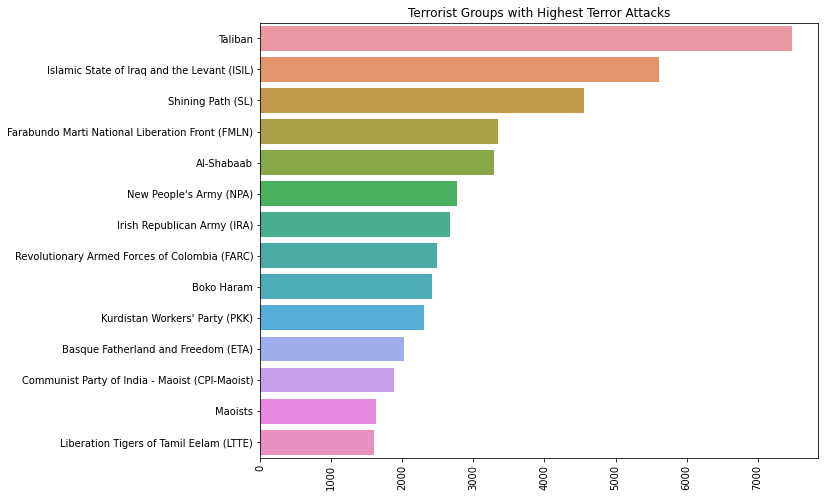

In [ ]:
sns.barplot(red_terror_df['gname'].value_counts()[1:15].values,red_terror_df['gname'].value_counts()[1:15].index)
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Terrorist Groups with Highest Terror Attacks')
plt.show()

In [124]:
terror_df.rename(columns={
                          'nkill':'Killed','nwound':'Wounded',
                          'weaptype1_txt':'Weapon_type'},inplace=True)

Creating class terror_detail to access information about particular terror attack and for city ,country ,region we get detail of every attacks which had happened there. 

In [125]:
class terror_detail:

  !apt-get install libgeos-3.5.0
  !apt-get install libgeos-dev
  !pip install https://github.com/matplotlib/basemap/archive/master.zip

  def __init__(self,country='India',city='New Delhi', year=1970,month=5):
    self.country=country
    self.city=city
    self.year=year
    self.month=month

  def detail_by_country(self):
    # number of attack in country every year
    filtered_data = terror_df[terror_df['country_txt']==self.country]
    plt.subplots(figsize=(10,3))
    sns.countplot('iyear',data=filtered_data,color='blue')
    plt.xticks(rotation=90)
    plt.title(f'Number Of Terrorist Attack Every Year in {self.country}')
    plt.show()

    success_df=filtered_data['success'].value_counts()
    t=success_df.to_frame()
    print()
    success_rate =(t.iloc[0,0])*100/((t.iloc[0,0])+(t.iloc[1,0])) 
    print(f'success_rate is {round(success_rate)}%')
    plt.pie(success_df, labels=({"successful":1,'unsuccessful':0}), autopct='%1.0f%%')


    # type of attack in country they prefer
    
    filtered_data = terror_df[terror_df['country_txt']==self.country]   
    plt.subplots(figsize=(15,6))
    sns.countplot('attacktype1_txt',data=filtered_data,color='blue')
    plt.xticks(rotation=90)
    plt.title(f'which type of attack they prefer in {self.country}')
    plt.show() 
    


    # terrorist group 
    sns.barplot(filtered_data['gname'].value_counts()[1:15].values,filtered_data['gname'].value_counts()[1:15].index)
    plt.xticks(rotation=90)
    fig=plt.gcf()
    fig.set_size_inches(10,8)
    plt.title(f'Terrorist Groups with Highest Terror Attacks in {self.country}')
    plt.show()
        
    # for element in (filtered_data.iloc[0,:]):
    #   strnf=strnf+ ' '+str(element)
    # print(strnf)

    
    # group they prefer
    plt.subplots(figsize=(15,6))
    sns.countplot('targsubtype1_txt',data=filtered_data,color='green')
    plt.xticks(rotation=90)
    plt.title(f'which type of groups they prefer to attack in {self.country}')
    plt.show()
    
    



    #  which city they attack most
    filtered_data3 =filtered_data['city'].value_counts()
    filtered_data3.head(10).plot(kind='bar')
    plt.rcParams['figure.figsize'] = (10, 10)
    plt.title(f'which cities terrorists attack most in {self.country}')


    plt.subplots(figsize=(15,6))
    sns.countplot('imonth',data=filtered_data,color='blue')
    plt.xticks(rotation=90)
    plt.title(f'In which month they prefer to attack in {self.city}')
    plt.show()
   
    # line plot for terorism group
    top_groups10=terror_df[terror_df['gname'].isin(terror_df['gname'].value_counts()[1:11].index)]
    terror_activities=pd.crosstab(top_groups10.iyear,top_groups10.gname).reset_index()

    terror_activities=terror_activities.set_index('iyear')

    plt.plot(terror_activities['Al-Shabaab'],'ro-', linewidth=2, markersize=5)
    plt.plot(terror_activities['Boko Haram'],'bo-', linewidth=2, markersize=4)
    plt.plot(terror_activities['Farabundo Marti National Liberation Front (FMLN)'],'go--', linewidth=2, markersize=4)
    plt.plot(terror_activities['Irish Republican Army (IRA)'],'yo-', linewidth=2, markersize=4)
    plt.plot(terror_activities['Islamic State of Iraq and the Levant (ISIL)'],color='black',marker='o', linewidth=2, markersize=4)
    plt.plot(terror_activities["Kurdistan Workers' Party (PKK)"],color='purple',marker='o', linewidth=2, markersize=4)
    plt.plot(terror_activities["New People's Army (NPA)"],color='aqua',marker='o', linewidth=2, markersize=4)
    plt.plot(terror_activities['Revolutionary Armed Forces of Colombia (FARC)'],color='orange',marker='o', linewidth=2, markersize=4)
    plt.plot(terror_activities['Shining Path (SL)'],color='magenta',marker='o', linewidth=2, markersize=4)
    plt.plot(terror_activities['Taliban'],color='pink',marker='o', linewidth=2, markersize=4)

    plt.legend(['Al-Shabaab','Boko Haram','Farabundo Marti National Liberation Front (FMLN)','Irish Republican Army (IRA)','Islamic State of Iraq and the Levant (ISIL)',"Kurdistan Workers' Party (PKK)","New People's Army (NPA)",'Revolutionary Armed Forces of Colombia (FARC)',"Shining Path (SL)",'Taliban'])
    plt.title("Terrorist Group active during Year")
    plt.xlabel('iyear')
    plt.ylabel('No of Attack')
    plt.show()



    global_map = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c',lat_0=True,lat_1=True)

    lat_=list(filtered_data[filtered_data['Killed']<30].latitude)
    long_=list(filtered_data[filtered_data['Killed']<30].longitude)
    x_,y_=global_map(long_,lat_)
    global_map.plot(x_, y_,'go',markersize=2,color = 'b',alpha=0.4)

    lat_=list(filtered_data[filtered_data['Wounded']<30].latitude)
    long_=list(filtered_data[filtered_data['Wounded']<30].longitude)
    x_,y_=global_map(long_,lat_)
    global_map.plot(x_, y_,'go',markersize=2,color = 'b',alpha=0.4)

    lat_=list(filtered_data[filtered_data['Wounded']>30].latitude)
    long_=list(filtered_data[filtered_data['Wounded']>30].longitude)
    x_,y_=global_map(long_,lat_)
    global_map.plot(x_, y_,'go',markersize=2,color = 'r',alpha=0.4)


    lat_=list(filtered_data[filtered_data['Killed']>30].latitude)
    long_=list(filtered_data[filtered_data['Killed']>30].longitude)
    x_,y_=global_map(long_,lat_)
    global_map.plot(x_, y_,'go',markersize=2,color = 'r',alpha=0.4)

    global_map.drawcoastlines()
    global_map.drawcountries()
    global_map.fillcontinents(lake_color='cyan')
    global_map.drawmapboundary(fill_color='cyan')
    fig=plt.gcf()
    fig.set_size_inches(20,6)
    plt.title('Global terrorist Attacks')

    plt.legend(loc='lower left',handles=[mpatches.Patch(color='red',label='>30 Killed and Wounded'),mpatches.Patch(color='blue',label='<30 Killed and Wounded')])

    plt.show()
          
  def terror_by_year(self):


    # which type of attack they prefer in that year
    year_df= terror_df[terror_df['iyear']==self.year]
    plt.subplots(figsize=(15,6))
    sns.countplot('attacktype1_txt',data=year_df,color='blue')
    plt.xticks(rotation=90)
    plt.title(f'Which type of attack they prefer in year {self.year}')
    plt.show()

    #  pie chart of success rate
    success_df=year_df['success'].value_counts()
    t=success_df.to_frame()
    print()
    success_rate =(t.iloc[0,0])*100/((t.iloc[0,0])+(t.iloc[1,0])) 
    print(f'success_rate is {round(success_rate)}%')
    plt.pie(success_df, labels=({"successful":1,'unsuccessful':0}), autopct='%1.0f%%')
    

    # cities the prefer
    plt.subplots(figsize=(15,6))
    sns.countplot('country_txt',data=year_df,color='blue')
    plt.xticks(rotation=90)
    plt.title(f'Countries on which they prefer to attack in year {self.year}')
    plt.show()

    # top countries cities in that year
    year_df= terror_df[terror_df['iyear']==self.year] 
    country_df= year_df['country_txt'].value_counts()
    country_df.head(10).plot(kind='bar')
    plt.rcParams['figure.figsize'] = (30, 10)

    #  which city they attack most
    plt.subplots(figsize=(15,6))
    sns.countplot('city',data=year_df,color='blue')
    plt.xticks(rotation=90)
    plt.title(f'Cities on which they prefer to attack in year {self.year}')
    plt.show()


     # terrorist group 
    sns.barplot(year_df['gname'].value_counts()[1:15].values,year_df['gname'].value_counts()[1:15].index)
    plt.xticks(rotation=90)
    fig=plt.gcf()
    fig.set_size_inches(10,8)
    plt.title(f'Terrorist Groups with Highest Terror Attacks in {self.year}')
    plt.show()

     # group they prefer
    plt.subplots(figsize=(15,6))
    sns.countplot('targsubtype1_txt',data=year_df,color='green')
    plt.xticks(rotation=90)
    plt.title(f'Which type of groups they prefer to attack in {self.year}')
    plt.show()

    plt.subplots(figsize=(15,6))
    sns.countplot('imonth',data=year_df,color='blue')
    plt.xticks(rotation=90)
    plt.title(f'In which month they prefer to attack in {self.year}')
    plt.show()
    

    # top 10 cities
    filtered_data3 =year_df['city'].value_counts()
    filtered_data3.head(10).plot(kind='bar')
    plt.rcParams['figure.figsize'] = (10, 10)
    plt.title(f'Which cities terrorists attack most in {self.year}')


  def succes_rate(self):



    success_df=terror_df['success'].value_counts()
    t=success_df.to_frame()
    print()
    success_rate =(t.iloc[0,0])*100/((t.iloc[0,0])+(t.iloc[1,0])) 
    print(f'success_rate is {round(success_rate)}%')
    plt.pie(success_df, labels=({"successful":1,'unsuccessful':0}), autopct='%1.0f%%')

  def success_rate_by_country(self):
    filtered_data1 = terror_df[terror_df['country_txt']==self.country]
    country_success_df= filtered_data1['success'].value_counts()
    q=country_success_df.to_frame()
    print(q)
    success_rate =(q.iloc[0,0])*100/((q.iloc[0,0])+(q.iloc[1,0])) 
    print(f'success_rate is {round(success_rate)}%')
    plt.pie(q, labels=({"successful":1,'unsuccessful':0}), autopct='%1.0f%%')
    plt.title(f'Pie chart represents success rate of terror attacks in {self.country}')



  def city_detail(self):



    # yearwise analysis of particular city   
    filtered_data3 = terror_df[terror_df['city']==self.city]
    plt.subplots(figsize=(10,3))
    sns.countplot('iyear',data=filtered_data3,color='blue')
    plt.xticks(rotation=90)
    plt.title(f'Number Of Terrorist Attack Every Year in {self.city}')
    plt.show() 
    
    # Attack type mostly happen in city

    # filtered_data3 = terror_df[terror_df['country_txt']==self.country]   
    plt.subplots(figsize=(15,6))
    sns.countplot('attacktype1_txt',data=filtered_data3,color='blue')
    plt.xticks(rotation=90)
    plt.title(f'Which type of attack they prefer in {self.city}')
    plt.show()
    
    # attck month
    plt.subplots(figsize=(15,6))
    sns.countplot('imonth',data=filtered_data3,color='blue')
    plt.xticks(rotation=90)
    plt.title(f'In which month they prefer to attack in {self.city}')
    plt.show()


    # terrorist group 
    sns.barplot(filtered_data3['gname'].value_counts()[1:15].values,filtered_data3['gname'].value_counts()[1:15].index)
    plt.xticks(rotation=90)
    fig=plt.gcf()
    fig.set_size_inches(10,8)
    plt.title(f'Terrorist Groups with Highest Terror Attacks in {self.city}')
    plt.show()


    #  pie chart of success rate(check)
    success_df=filtered_data3['success'].value_counts()
    t=success_df.to_frame()
    print()
    success_rate =(t.iloc[0,0])*100/((t.iloc[0,0])+(t.iloc[1,0])) 
    print(f'success_rate is {round(success_rate)}%')
    plt.pie(success_df, labels=({"successful":1,'unsuccessful':0}), autopct='%1.0f%%')
    

    # group they prefer(check)
    plt.subplots(figsize=(15,6))
    sns.countplot('targsubtype1_txt',data=filtered_data3,color='green')
    plt.xticks(rotation=90)
    plt.title(f'Which type of groups they prefer to attack in {self.city}')
    plt.show()


    
 
  
    
     
  #   change in terror condition by country over the year 
  def terror_condition(self):



    filtered_data2 = terror_df[terror_df['country_txt']==self.country]
    trr_cdtn=filtered_data2['iyear'].value_counts()
    print(trr_cdtn.iloc[0])
    print(trr_cdtn.iloc[-1])
    trr_cdtn.head(100).plot(kind='bar').invert_xaxis() 
    plt.rcParams['figure.figsize'] = (30, 10)

    # plt.subplots(figsize=(15,6))
    # sns.countplot('',data=trr_cdtn,color='blue')
    # plt.xticks(rotation=90)
    # plt.title('Number Of Terrorist Attack Every Year')

    # plt.show()
  def Global_terror_prone_region(self):
    total_of_terror_attack=len(terror_df['iyear'])
    no_of_attack_per_year=  total_of_terror_attack/47
    print('no_of_attack_per_year=',no_of_attack_per_year)
    print('no_of_attack_total=',total_of_terror_attack)

    d=terror_df['region_txt'].value_counts()
    d.head(100).plot(kind='bar')
    plt.rcParams['figure.figsize'] = (30, 10)
    plt.title(f'Which region terrorists attack most in {self.country}')






    # d=terror_df['region_txt'].value_counts().to_frame().reset_index()
    # print(d)
    # d.plot.hexbin(x='region_txt',y='index',gridsize=30, figsize=(8,6))
    # # plt.show()



    


  def terror_stacked_10_year(self):
    stck_df=terror_df[(terror_df['iyear']>=1970) & (terror_df['iyear']<=1979)]
    plt.subplots(figsize=(20,6))
    sns.countplot('country_txt',data=stck_df,color='blue')
    plt.xticks(rotation=90)
    plt.title(f'Which type of attack they prefer in year {self.year}')
    plt.show()
       
    stck_df1=terror_df[(terror_df['iyear']>=1980) & (terror_df['iyear']<=1989)]
    plt.subplots(figsize=(20,6))
    sns.countplot('country_txt',data=stck_df1,color='blue')
    plt.xticks(rotation=90)
    plt.title(f'Which type of attack they prefer in year {self.year}')
    plt.show()   
     
    stck_df2=terror_df[(terror_df['iyear']>=1990) & (terror_df['iyear']<=1999)]
    plt.subplots(figsize=(20,6))
    sns.countplot('country_txt',data=stck_df2,color='blue')
    plt.xticks(rotation=90)
    plt.title(f'Which type of attack they prefer in year {self.year}')
    plt.show()   
     

    stck_df3=terror_df[(terror_df['iyear']>=2000) & (terror_df['iyear']<=2009)]
    plt.subplots(figsize=(20,6))
    sns.countplot('country_txt',data=stck_df3,color='blue')
    plt.xticks(rotation=90)
    plt.title(f'Which type of attack they prefer in year {self.year}')
    plt.show()   
     

    stck_df4=terror_df[(terror_df['iyear']>=2010) & (terror_df['iyear']<=2017)]
    plt.subplots(figsize=(20,6))
    sns.countplot('country_txt',data=stck_df4,color='blue')
    plt.xticks(rotation=90)
    plt.title(f'Which type of attack they prefer in year {self.year}')
    plt.show()   
     

  def safe(self):
    # total_of_terror_attack=len(terror_df['iyear'])
    # no_of_attack_per_year=  total_of_terror_attack/47
    # print('no_of_attack_per_year=',no_of_attack_per_year)

    filtered_data2 = terror_df[terror_df['country_txt']==self.country]
    num_of_attack_per_yr=len(filtered_data2)//47
    if num_of_attack_per_yr<10:
      print(f'{self.country} is safe for peoples')
    
    elif num_of_attack_per_yr>10 and num_of_attack_per_yr<50:
      print(f'{self.country} is moderately safe for peoples')
    elif num_of_attack_per_yr>50 and num_of_attack_per_yr<200:
      print(f'{self.country} is not safe for peoples')
    else:
      print(f'{self.country} is not safe for peoples,and extremly prone to attacks')

    







    
    



  def info_detail_string(self):
    self.country_df=terror_df[terror_df['country_txt']==self.country ]
    self.country_year_df=self.country_df[self.country_df['iyear'] == self.year]

    self.month_df=self.country_year_df[self.country_year_df['imonth'] == self.month]
    for index, row in self.month_df.iterrows():
      if row['success'] ==0:

        print('no_attacks happen')
      else:
        news_head=row['scite1']
        day=row['iday']
        target=row['targtype1_txt']
        summary=row['summary']
        print(f"News HeadLine={news_head} and target was {target} and  {summary}")
        print('\n')
         
    



Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
0 upgraded, 0 newly installed, 0 to remove and 12 not upgraded.
  Using cached https://github.com/matplotlib/basemap/archive/master.zip
  Created wheel for basemap: filename=basemap-1.2.1-cp36-cp36m-linux_x86_64.whl size=121756183 sha256=fe633bdbd86b1e755fdbe4432b7a2be9a3b0a9779eca36bb1f21656540270899
  Stored in directory: /tmp/pip-ephem-wheel-cache-6blson6a/wheels/98/4a/fc/ce719b75d97e646645c225f3332b1b217536100314922e9572
Successfully built basemap


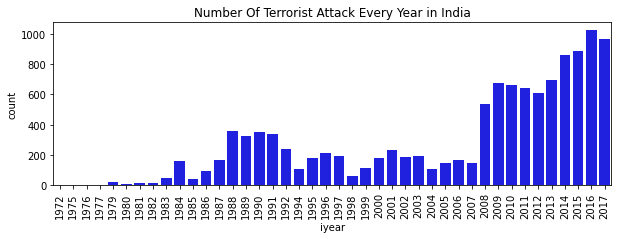


success_rate is 86.0%


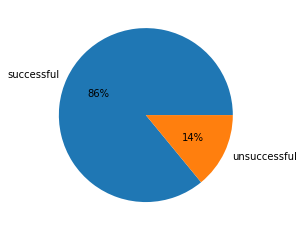

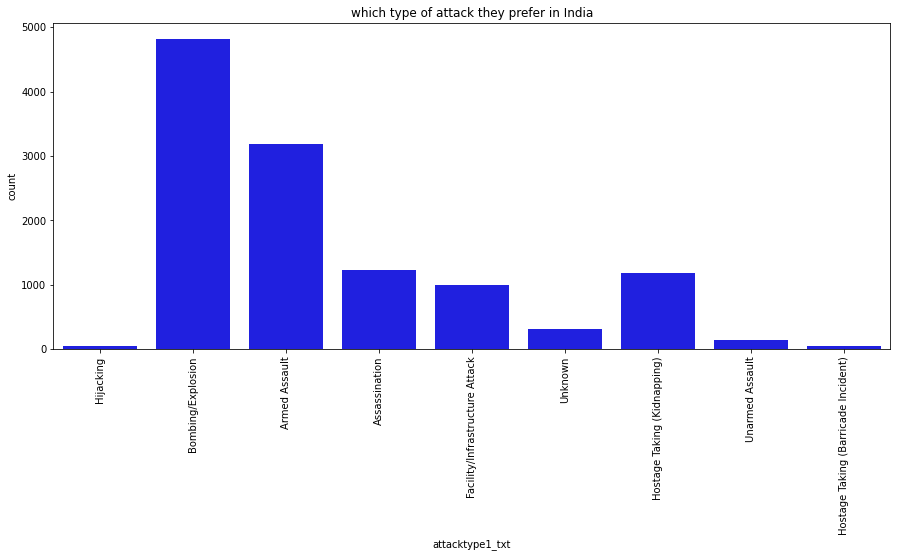

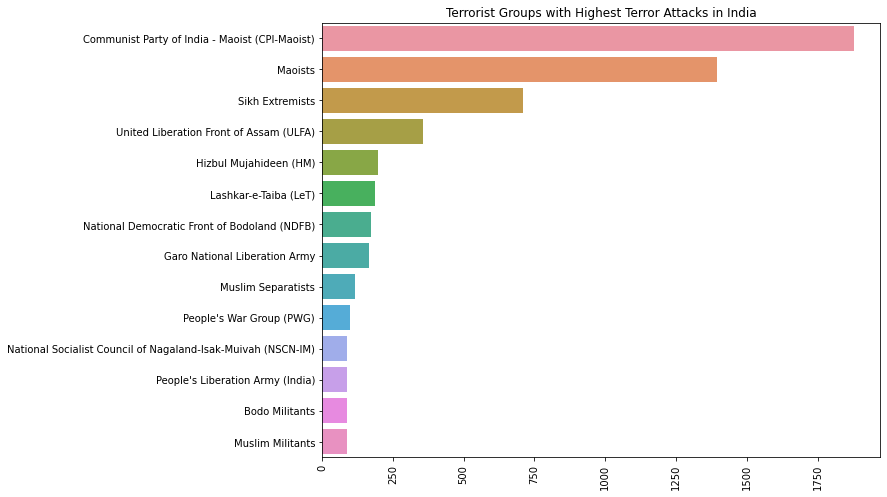

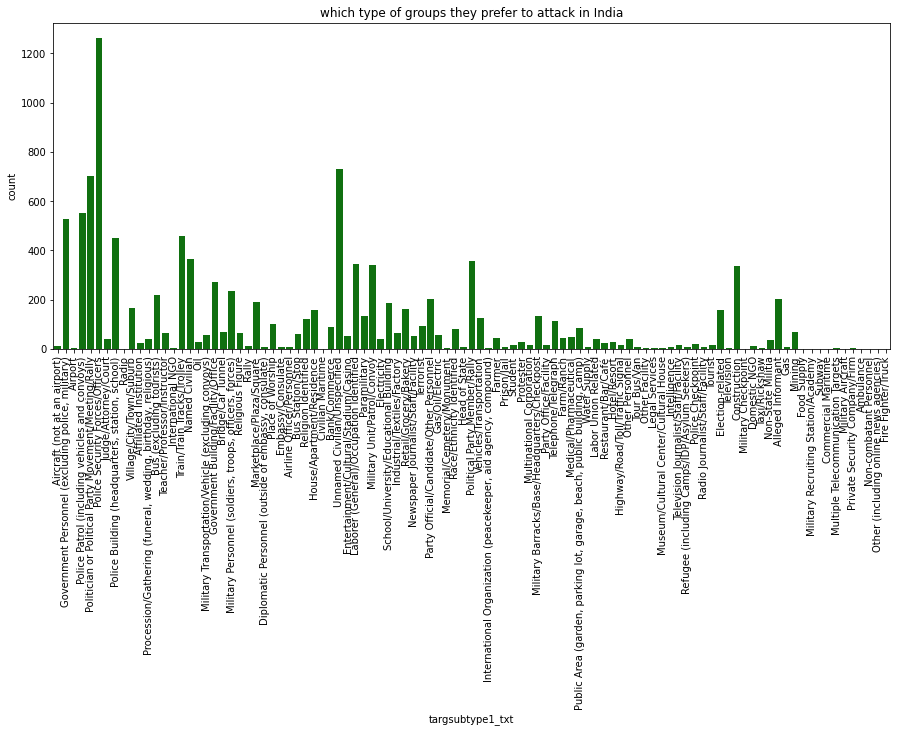

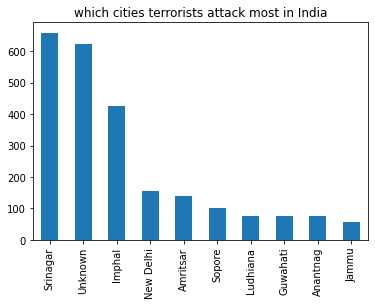

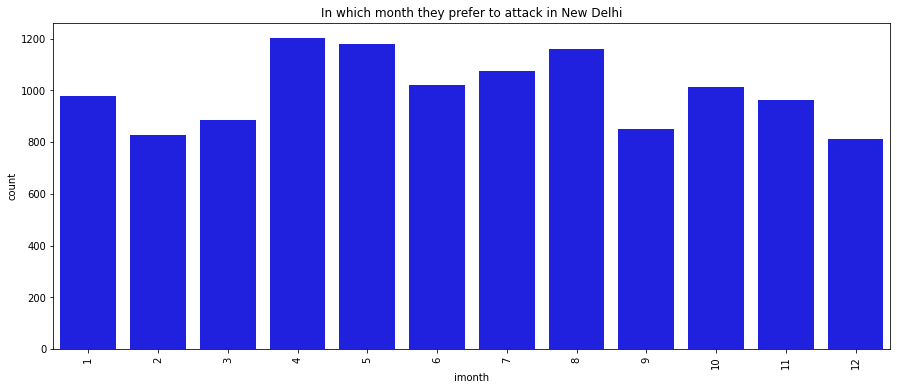

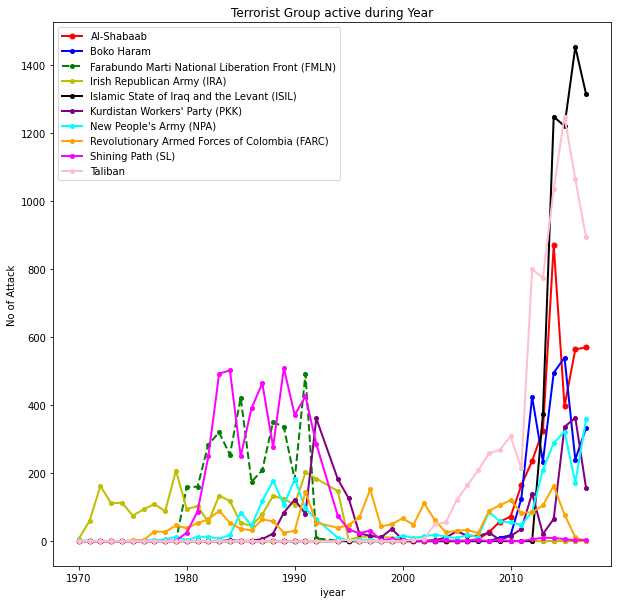

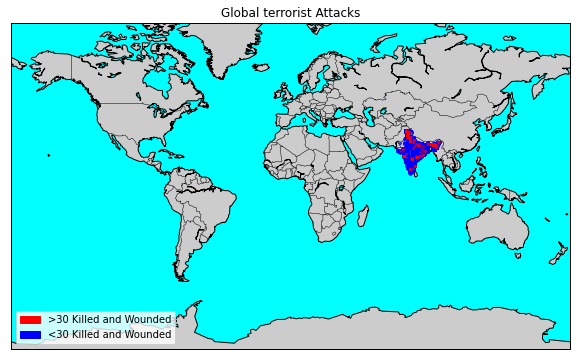

In [128]:
a=terror_detail(country='India',year=2017,city='New Delhi',month=6)
# a.terror_by_year()
a.detail_by_country()
# a.success_rate_by_country()
# a.succes_rate()
# a.terror_condition()
# a.Global_terror_prone_region()
# a.city_detail()
# a.terror_stacked_10_year()
# a.safe()
# a.info_detail_string()


In [ ]:
filtered_data = terror_df[terror_df['country_txt']=='India'].reset_index()
filtered_data

,index,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1186,197202220004,1972,2,22,NaN,0,NaN,92,India,6,South Asia,Delhi,New Delhi,28.585836,77.153336,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,4,Hijacking,NaN,NaN,NaN,NaN,6,Airports & Aircraft,42.0,Aircraft (not at an airport),Lufthansa,...,NaN,NaN,Explosives,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,1.0,187.0,0.0,NaN,NaN,Yemen,Yemen,1.0,5000000.0,NaN,NaN,NaN,NaN,2.0,Hostage(s) released by perpetrators,187.0,NaN,NaN,NaN,NaN,Hijacking DB,1,1,1,1,NaN
1,2764,197501190004,1975,1,2,NaN,0,NaN,92,India,6,South Asia,Bihar,Samastipur,25.863042,85.781004,1.0,0,The attack occurred in the town,"1/2/1975: The Indian Railway Minister, Lalit N...",1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,2,Government (General),18.0,"Government Personnel (excluding police, military)",Railway Minister of India and legislator,...,NaN,NaN,No additional information available.,4.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,The case is very unclear and there are many ru...,"""Leaders of India Irate at Killing: Death of A...","Dhananjay Mahapatra, ""SC: Why has LN Mishra mu...",NaN,UMD Encyclopedia of World Terrorism 2012,0,0,0,0,NaN
2,3857,197605260001,1976,5,26,NaN,0,NaN,92,India,6,South Asia,Delhi,New Delhi,28.585836,77.153336,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,6,Airports & Aircraft,44.0,Airport,NaN,...,NaN,NaN,Explosive,0.0,NaN,NaN,0.0,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,0,-9,NaN
3,5327,197709280004,1977,9,28,NaN,0,NaN,92,India,6,South Asia,Maharashtra,Bombay,19.075984,72.877656,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,4,Hijacking,NaN,NaN,NaN,NaN,6,Airports & Aircraft,42.0,Aircraft (not at an airport),Japan Airlines,...,NaN,NaN,Firearm; Grenades,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,1.0,146.0,9.0,NaN,NaN,Algeria,Algeria,1.0,6000000.0,NaN,NaN,NaN,NaN,2.0,Hostage(s) released by perpetrators,NaN,NaN,NaN,NaN,NaN,Hijacking DB,1,1,1,1,NaN
4,7337,197901130004,1979,1,13,NaN,0,NaN,92,India,6,South Asia,Assam,Unknown,26.200605,92.937574,4.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,3,Police,23.0,Police Patrol (including vehicles and convoys),Police,...,NaN,NaN,Automatic firearm,NaN,NaN,NaN,NaN,NaN,NaN,1,4.0,Unknown,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11955,181663,201712300021,2017,12,30,NaN,0,NaN,92,India,6,South Asia,Kerala,Koothuparamba,11.831902,75.565432,1.0,0,The incident occurred in the Kannur district.,12/30/2017: Assailants threw an explosive devi...,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,3,Police,22.0,"Police Building (headquarters, station, school)",Indian Police Service (IPS),...,NaN,NaN,A crude bomb was used in the attack.,0.0,0.0,0.0,0.0,

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


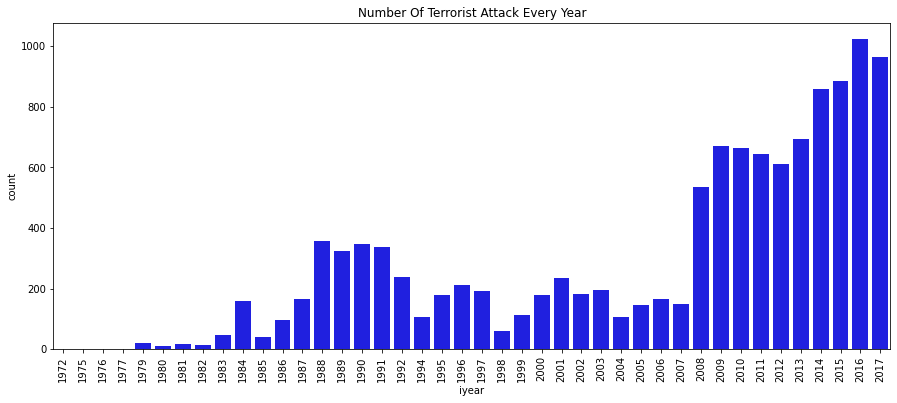

In [ ]:
plt.subplots(figsize=(15,6))
sns.countplot('iyear',data=filtered_data,color='blue')
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Attack Every Year')

plt.show()

In [ ]:
filtered_data.iloc[0,:]

index               1186
eventid     197202220004
iyear               1972
imonth                 2
iday                  22
                ...     
INT_LOG                1
INT_IDEO               1
INT_MISC               1
INT_ANY                1
related              NaN
Name: 0, Length: 136, dtype: object

In [ ]:
filtered_data1 = filtered_data['city'].value_counts()
filtered_data1 


Srinagar      658
Unknown       624
Imphal        426
New Delhi     157
Amritsar      138
             ... 
Beldih          1
Perampalli      1
Soibugh         1
Topari          1
Birnawan        1
Name: city, Length: 4798, dtype: int64

NameError: ignored

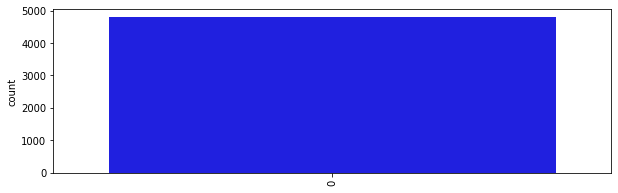

In [ ]:
filtered_data1 = filtered_data['city'].value_counts()
plt.subplots(figsize=(10,3))
sns.countplot(data=filtered_data1,color='blue')
plt.xticks(rotation=90)
plt.title(f'Number Of Terrorist Attack Every Year in {self.country}')
plt.show()
    

In [ ]:
filtered_data1 = filtered_data['city'].value_counts().to_frame()
filtered_data1
# x=filtered_data1.rename(columns={'city':'num'})
# x.reset_index()

In [ ]:
x['num']

In [ ]:
len(terror_df['iyear'])

In [ ]:
filtered_data2 = terror_df[terror_df['country_txt']=='India']
len(filtered_data2)/47

In [ ]:
plt.subplots(figsize=(15,6))
    sns.countplot('city',data=year_df,color='blue')
    plt.xticks(rotation=90)
    plt.title(f'cities on which they prefer to attack in year')
    plt.show()


In [ ]:
corrmat = red_terror_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);